In [45]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
!pip install dtw
from dtw import dtw

  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5315 sha256=a332933d950e2831306eea33d22844547245527d3364521a3db554d4242d7fea
  Stored in directory: /root/.cache/pip/wheels/f9/51/54/b7f446e6d4f5be9a66066b59c5030731191260515737be4496
Successfully built dtw


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


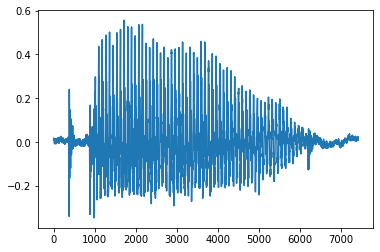

In [14]:
signalTest, srTest = librosa.load(r'gdrive/MyDrive/Data/06/DTW/A/A.wav')
plt.plot(signalTest)
ipd.Audio(data=signalTest, rate=srTest)

In [35]:
def feature_visualization(feature, sr):
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(feature, x_axis="time", sr=sr)
  plt.colorbar(format="%+2.f")
  plt.show()

(20, 34)


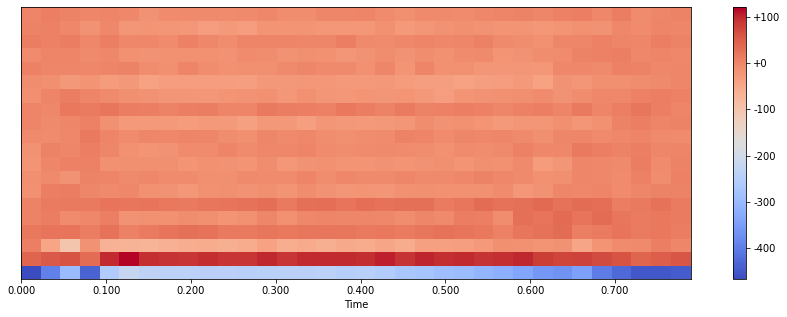

In [36]:
# extract MFCC features 
mfcc = librosa.feature.mfcc(y=signalTest, sr=srTest, n_fft=int(0.02*srTest), hop_length=int(0.01*srTest))
print(mfcc.shape) # (n_mfcc=20, n_frame=34)

# mfcc visualization
feature_visualization(mfcc, srTest)

In [23]:
# 3 sample of word 'A'
signal1, sr1 = librosa.load(r'gdrive/MyDrive/Data/06/DTW/A/A1.wav')
signal2, sr2 = librosa.load(r'gdrive/MyDrive/Data/06/DTW/A/A2.wav')
signal3, sr3 = librosa.load(r'gdrive/MyDrive/Data/06/DTW/A/A3.wav')

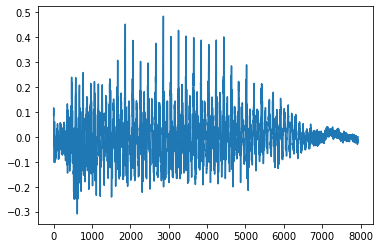

In [25]:
plt.plot(signal1)
ipd.Audio(data=signal1, rate=sr1)

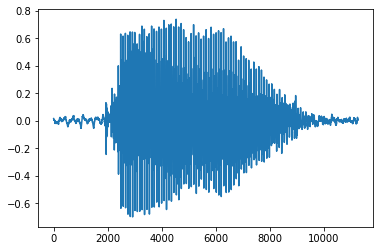

In [26]:
plt.plot(signal2)
ipd.Audio(data=signal2, rate=sr2)

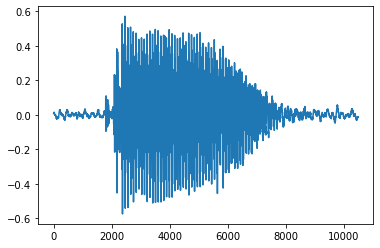

In [27]:
plt.plot(signal3)
ipd.Audio(data=signal3, rate=sr3)

In [28]:
# extract MFCC features of samples
mfcc1 = librosa.feature.mfcc(y=signal1, sr=sr1, n_fft=int(0.02*sr1), hop_length=int(0.01*sr1))
print(mfcc1.shape) # (n_mfcc,n_frame)

mfcc2 = librosa.feature.mfcc(y=signal2, sr=sr2, n_fft=int(0.02*sr2), hop_length=int(0.01*sr2))
print(mfcc2.shape) 

mfcc3 = librosa.feature.mfcc(y=signal3, sr=sr3, n_fft=int(0.02*sr3), hop_length=int(0.01*sr3))
print(mfcc3.shape) 

(20, 37)
(20, 52)
(20, 48)


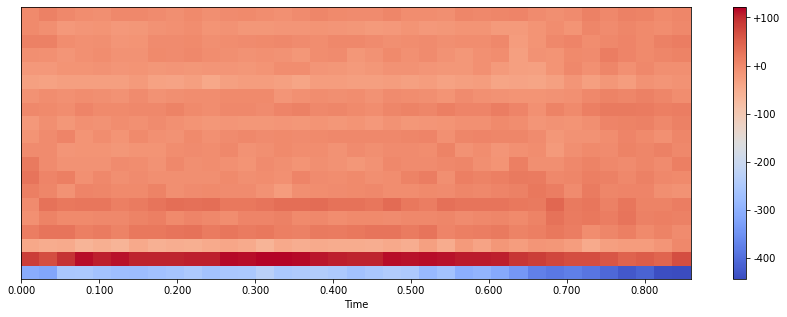

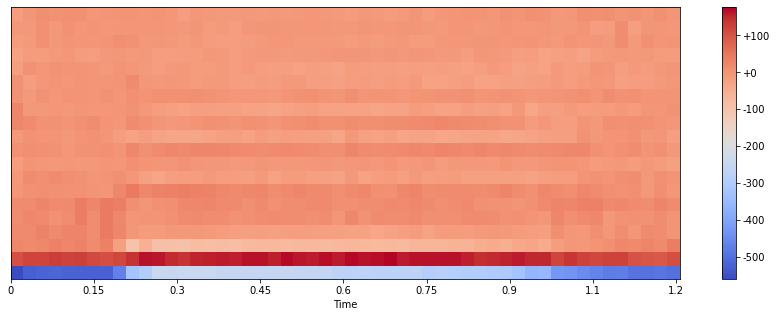

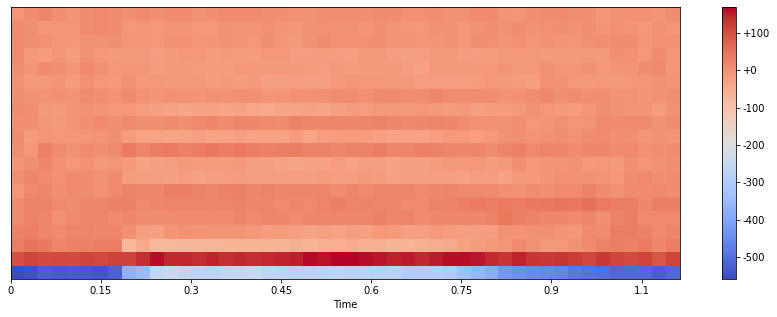

In [37]:
feature_visualization(mfcc1, sr1)
feature_visualization(mfcc2, sr2)
feature_visualization(mfcc3, sr3)

In [43]:
# Remove mean and normalize each column of MFCC 
import copy
def preprocess_mfcc(mfcc):
    mfcc_cp = copy.deepcopy(mfcc)
    for i in range(mfcc.shape[1]):
        mfcc_cp[:,i] = mfcc[:,i] - np.mean(mfcc[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp

mfcc = preprocess_mfcc(mfcc)
mfcc1 = preprocess_mfcc(mfcc1)
mfcc2 = preprocess_mfcc(mfcc2)
mfcc3 = preprocess_mfcc(mfcc3)

## Word identification

In [47]:
print(mfcc.shape, mfcc1.shape, mfcc2.shape, mfcc3.shape)

(20, 34) (20, 37) (20, 52) (20, 48)


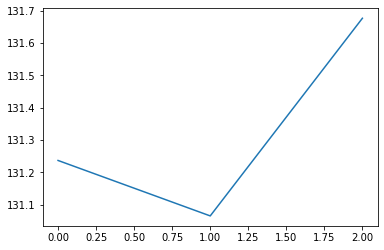

In [48]:
window_size = mfcc1.shape[1]
dists = np.zeros(window_size-mfcc.shape[1])

for i in range(len(dists)):
    mfcci = mfcc[:,i:i+window_size]
    dist1i = dtw(mfcc1.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist2i = dtw(mfcc2.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist3i = dtw(mfcc3.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dists[i] = (dist1i + dist2i + dist3i)/3
plt.plot(dists)


In [49]:
# select minimum distance window
word_match_idx = dists.argmin()

In [50]:
# convert MFCC to time domain
word_match_idx_bnds = np.array([word_match_idx,np.ceil(word_match_idx+window_size)])
samples_per_mfcc = 512
word_samp_bounds = (2/2) + (word_match_idx_bnds*samples_per_mfcc)
print(word_match_idx_bnds, word_samp_bounds)
print(word_samp_bounds[0], word_samp_bounds[1])

[ 1. 38.] [  513. 19457.]
513.0 19457.0


In [51]:
word = signalTest[int(word_samp_bounds[0]):int(word_samp_bounds[1])]
print(signalTest)
print(word)

[0.01269531 0.01579285 0.01821899 ... 0.01504517 0.01641846 0.01293945]
[-0.00248718  0.00315857  0.00447083 ...  0.01504517  0.01641846
  0.01293945]


In [52]:
ipd.Audio(data=word, rate=sr1)